ANALISIS EXPLORATORIO DE LOS DATOS

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns
import numpy as np

In [12]:
#Cargar datos
df = pd.read_csv('./datos/dataset_completo.csv', parse_dates=['fecha'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533 entries, 0 to 532
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fecha                  533 non-null    object 
 1   marca                  533 non-null    object 
 2   ea                     533 non-null    float64
 3   er                     533 non-null    float64
 4   eo                     533 non-null    float64
 5   gfa                    533 non-null    float64
 6   gfr                    533 non-null    float64
 7   abv                    533 non-null    float64
 8   pH                     533 non-null    float64
 9   grupo                  533 non-null    object 
 10  reposo2_min            533 non-null    float64
 11  reposo2_temp           533 non-null    float64
 12  reposo3_min            533 non-null    float64
 13  reposo3_temp           533 non-null    float64
 14  reposo4_min            533 non-null    float64
 15  reposo

In [13]:

#Calcula el resumen y añade el número de valores faltantes
desc = df.describe(include='all').transpose()
desc['missing'] = df.isnull().sum()

#Reordena y redondea las columnas de interés
cols = ['count', 'missing', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
desc = desc[cols].round(2)

# Convierte el índice en columna y ponle de nombre 'atributo'
desc.index.name = 'atributo'
desc = desc.reset_index()

# Muestra por pantalla
print("### Resumen Estadístico\n")
print(tabulate(desc, headers='keys', tablefmt='github', floatfmt=".2f"))

# Exporta a CSV con la primera fila como cabeceras y sin índice adicional
desc.to_csv('./datos/resumen_estad.csv', index=False, header=True)


### Resumen Estadístico

|    | atributo              |   count |   missing |   mean |    std |    min |    25% |    50% |    75% |    max |
|----|-----------------------|---------|-----------|--------|--------|--------|--------|--------|--------|--------|
|  0 | fecha                 |  533.00 |         0 | nan    | nan    | nan    | nan    | nan    | nan    | nan    |
|  1 | marca                 |  533.00 |         0 | nan    | nan    | nan    | nan    | nan    | nan    | nan    |
|  2 | ea                    |  533.00 |         0 |   2.72 |   0.10 |   2.21 |   2.64 |   2.72 |   2.80 |   3.00 |
|  3 | er                    |  533.00 |         0 |   5.17 |   0.10 |   4.72 |   5.10 |   5.18 |   5.24 |   5.44 |
|  4 | eo                    |  533.00 |         0 |  15.50 |   0.26 |  14.53 |  15.33 |  15.53 |  15.68 |  16.03 |
|  5 | gfa                   |  533.00 |         0 |  82.45 |   0.69 |  79.73 |  82.01 |  82.41 |  82.92 |  85.36 |
|  6 | gfr                   |  533.00 |       

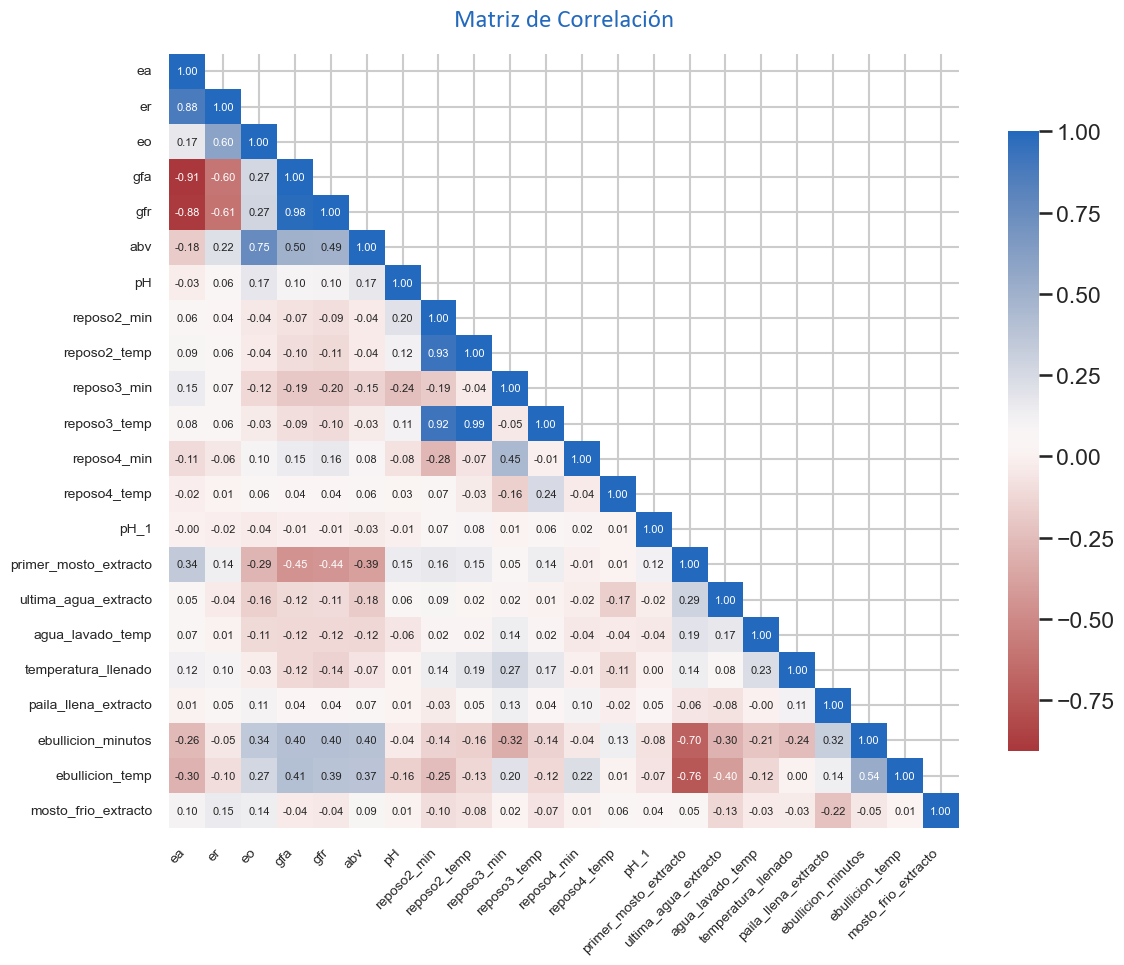

In [14]:
#Matriz de correlación
def heatmap_seaborn(df, annot_size=8, title_style=None):
    corr = df.select_dtypes(include='number').corr()
    mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

    plt.figure(figsize=(12,10))
    sns.heatmap(
        corr, mask=mask, annot=True, fmt=".2f", 
        cmap='vlag_r', cbar_kws={"shrink": .8}, annot_kws={"size": annot_size} 
    )

    if title_style is None:
        title_style = {
            'fontsize': 18,
            'fontweight': 'bold',
            'color': 'darkblue',
            'loc': 'center',
            'pad': 20,
            'fontfamily': 'serif'
        }

    plt.title("Matriz de Correlación", **title_style)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(rotation=0, fontsize=10)
    plt.tight_layout()
    plt.show()

heatmap_seaborn(df, 8, title_style={
    'fontsize': 18,
    'fontweight': '400',
    'color': '#2369BD',
    'loc': 'center',
    'pad': 20,
    'fontfamily': 'Calibri'
})

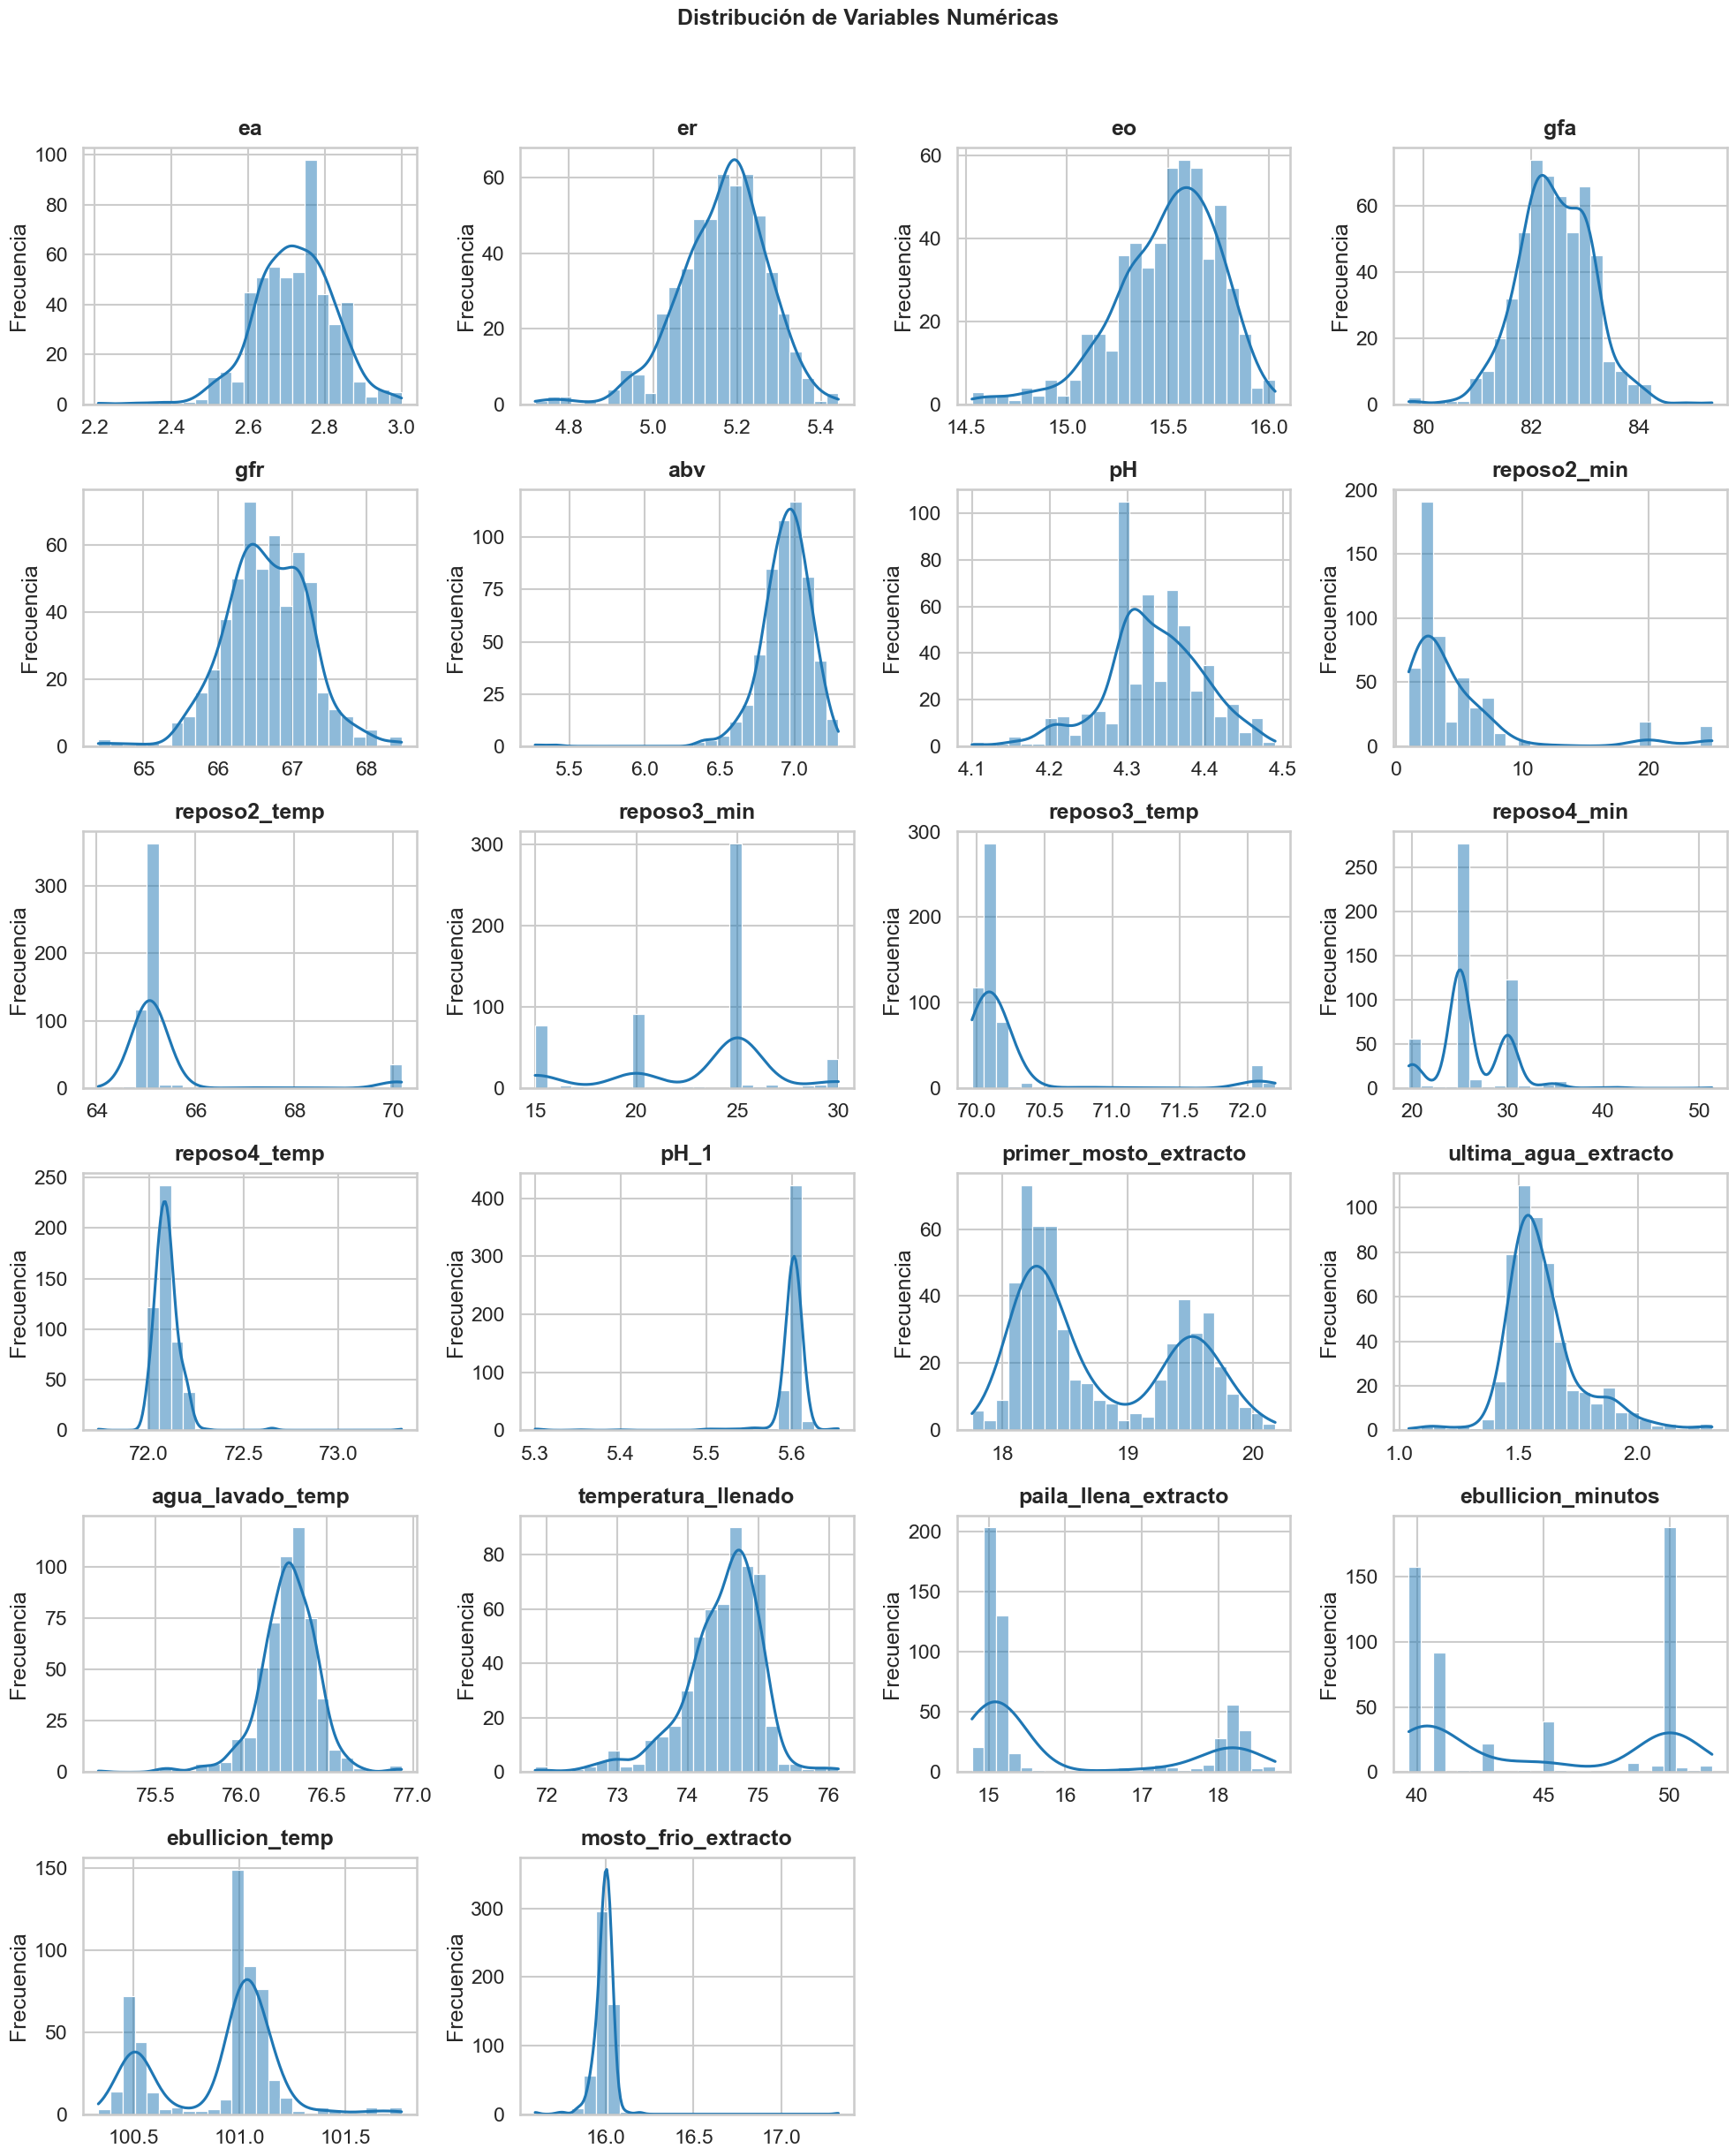

In [15]:
#Gráficos de distribución de datos
def plot_all_histograms(df, bins=30, cols=3):

    sns.set_style('whitegrid')
    sns.set_context('talk')

    num_cols = df.select_dtypes(include='number').columns
    n_vars = len(num_cols)
    rows = int(np.ceil(n_vars / cols))

    #Crear figura y ejes
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4), 
                             sharex=False, sharey=False)
    axes = axes.flatten()

    #Dibujar cada histograma
    for ax, col in zip(axes, num_cols):
        sns.histplot(
            df[col], 
            bins=bins, 
            kde=True,
            ax=ax
        )
        ax.set_title(col, fontweight='bold', pad=10)
        ax.set_xlabel('')
        ax.set_ylabel('Frecuencia')

    for ax in axes[n_vars:]:
        fig.delaxes(ax)

    fig.suptitle('Distribución de Variables Numéricas', 
                 fontsize=18, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

plot_all_histograms(df, bins=25, cols=4)

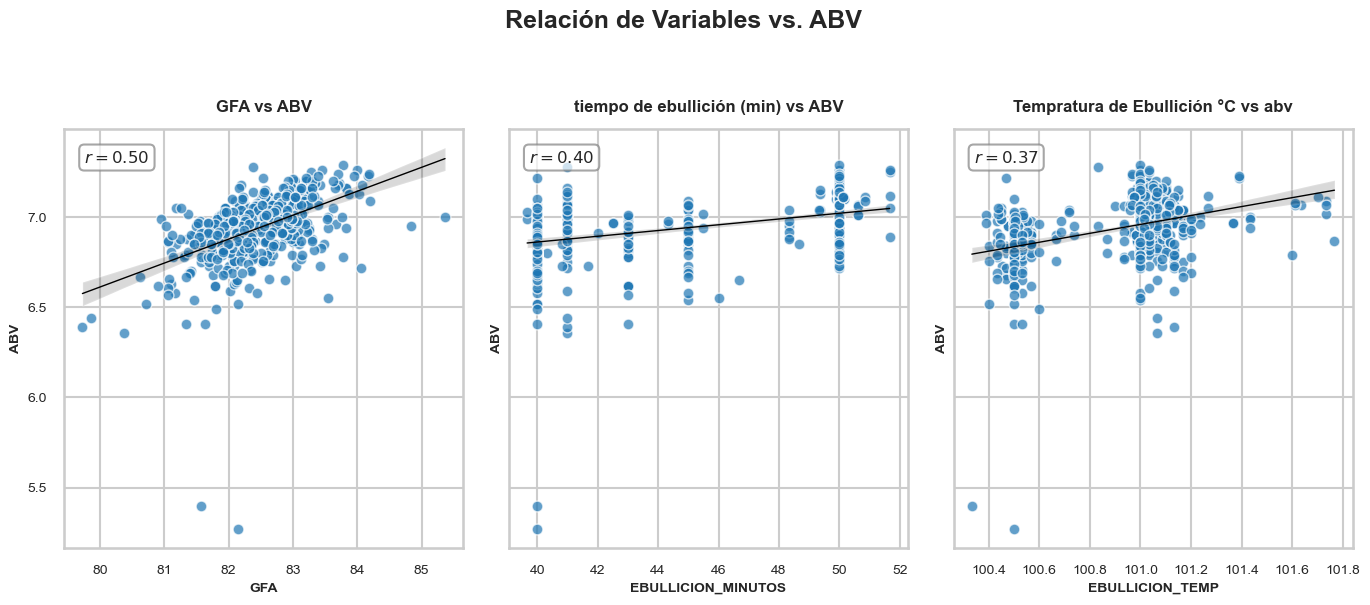

In [16]:
#Análisis gráfico de correlación GFA, tiempo de ebullición y temperatura de ebullición
def plot_scatter_factors(df):

    sns.set_style('whitegrid')
    sns.set_context('talk')

    #Prepara figura con dos subplots
    fig, axes = plt.subplots(1, 3, figsize=(14, 6), sharey=True)

    #Lista de pares a graficar
    pairs = [('gfa', 'abv'),('ebullicion_minutos','abv'),('ebullicion_temp','abv')]
    titles = ['GFA vs ABV', 'tiempo de ebullición (min) vs ABV', 'Tempratura de Ebullición °C vs abv']

    for ax, (x, y), title in zip(axes, pairs, titles):
        #Scatter con línea de regresión
        sns.regplot(
            x=x, y=y, data=df, ax=ax,
            scatter_kws={'s': 60, 'alpha': 0.7, 'edgecolor': 'w'},
            line_kws={'color': 'black', 'lw': 1}
        )

        #Coeficiente de correlación
        r = df[x].corr(df[y])
        ax.text(
            0.05, 0.95, f'$r = {r:.2f}$',
            transform=ax.transAxes,
            ha='left', va='top',
            fontsize=12,
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='gray', alpha=0.7)
        )

        #Etiquetas y título de cada subplot
        ax.set_title(title, fontweight='bold', pad=12, fontsize=12)
        ax.set_xlabel(x.upper(),fontweight='bold', fontsize=10)
        ax.set_ylabel(y.upper(),fontweight='bold', fontsize=10)
        ax.tick_params(axis='x', labelsize=10)
        ax.tick_params(axis='y', labelsize=10)

    #Título global y ajuste de layout
    fig.suptitle('Relación de Variables vs. ABV', fontsize=18, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()
    
plot_scatter_factors(df)

In [17]:
#Tratamiento de datos faltantes

#Calcula las medianas
median_ph          = df['pH'].median()
median_reposo4_min = df['reposo4_min'].median()
median_reposo4_temp= df['reposo4_temp'].median()

#Imputa en bloque con un dict
df.fillna({
    'pH':           median_ph,
    'reposo4_min':  median_reposo4_min,
    'reposo4_temp': median_reposo4_temp
}, inplace=True)

#Verifica
print(df[['pH', 'reposo4_min', 'reposo4_temp']].isnull().sum())


#Guardar dataset imputado
df.to_csv('./datos/dataset_limpio.csv', index=False)


pH              0
reposo4_min     0
reposo4_temp    0
dtype: int64
